https://www.youtube.com/watch?v=06TE_U21FK4

GET THE CODE FROM THE VIDEO:
https://github.com/nicknochnack/MediaPipePoseEstimation

# 1. Install and Import Dependencies

In [1]:
!pip install mediapipe opencv-python
!pip install opencv-contrib-python==4.5.3.56
!pip install --upgrade matplotlib

# 2. Determining Joints

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

In [2]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 使用影片檔案來源
cap = cv2.VideoCapture("/Users/peilinyang/Desktop/Sit_to_Stand/01.mp4")

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.9, min_tracking_confidence=0.9) as pose:
    while cap.isOpened():
        # 讀取影格
        ret, frame = cap.read()
        
        # 檢查是否成功讀取到影格
        if not ret:
            print("End of video. Exiting...")
            break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        
        # 顯示處理後的影像
        cv2.imshow('Mediapipe Feed', image)

        # 按 'q' 鍵退出
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # 釋放影片檔案來源
    cap.release()
    cv2.destroyAllWindows()


2023-12-12 09:30:57.103226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


[x: 0.42552027106285095
y: 0.3486972153186798
z: -0.31807222962379456
visibility: 0.9996705055236816
, x: 0.44744673371315
y: 0.33764371275901794
z: -0.26287585496902466
visibility: 0.9993919134140015
, x: 0.4583775997161865
y: 0.33788174390792847
z: -0.2629154920578003
visibility: 0.9992783665657043
, x: 0.4705714285373688
y: 0.3384791314601898
z: -0.26277390122413635
visibility: 0.9994196891784668
, x: 0.40974900126457214
y: 0.33811888098716736
z: -0.26475989818573
visibility: 0.9993769526481628
, x: 0.39639338850975037
y: 0.33867689967155457
z: -0.2646731436252594
visibility: 0.999254047870636
, x: 0.38543111085891724
y: 0.33938372135162354
z: -0.2647254765033722
visibility: 0.9993293285369873
, x: 0.4919990599155426
y: 0.3470856249332428
z: 0.02616903744637966
visibility: 0.9991266131401062
, x: 0.3672027587890625
y: 0.34799960255622864
z: 0.02038550190627575
visibility: 0.9988007545471191
, x: 0.45231905579566956
y: 0.36468350887298584
z: -0.20908495783805847
visibility: 0.9993067

# 3. Calculate Number of Final Sit-to-Stand Movements and draw angle chart

In [3]:
landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]

x: 0.6202850341796875
y: 0.6520489454269409
z: 0.2633303701877594
visibility: 0.9993672370910645

In [4]:
landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]

x: 0.27434858679771423
y: 0.7340184450149536
z: -0.15139663219451904
visibility: 0.8895750641822815

In [5]:
landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

x: 0.40676841139793396
y: 0.9091606140136719
z: 0.05721599981188774
visibility: 0.8714680671691895

1
2
3
4
5
6
7
8
9
10
End of video. Exiting...


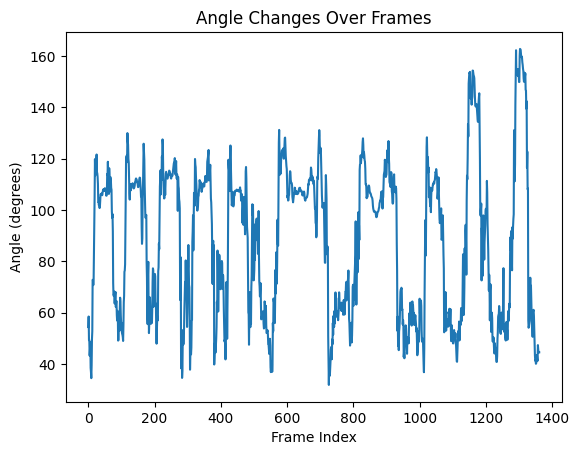

Final sit to stand: 10


In [6]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 使用影片檔案來源
cap = cv2.VideoCapture("/Users/peilinyang/Desktop/Sit_to_Stand/01.mp4")
# 即時影像偵測：cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0
stage = None

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.9, min_tracking_confidence=0.9) as pose:
    angles_list = []  # 用來存儲每一幀的角度

    while cap.isOpened():
        # 讀取影格
        ret, frame = cap.read()

        # 檢查是否成功讀取到影格
        if not ret:
            print("End of video. Exiting...")
            break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark

            # 取得右腳 hip、knee、ankle 的 3D 座標
            right_hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z])

            right_knee = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                                   landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y,
                                   landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z])

            right_ankle = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y,
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z])

            # 計算夾角（以弧度為單位）
            vector1 = right_hip - right_knee
            vector2 = right_ankle - right_knee
            dot_product = np.dot(vector1, vector2)
            norm_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cos_theta = dot_product / norm_product
            angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))

            # 將弧度轉換為角度
            angle_deg = np.degrees(angle_rad)

            # 將角度添加到列表中
            angles_list.append(angle_deg)

            # 設定閾值
            threshold_high = 110
            threshold_low = 50

            # 判斷角度是否超過閾值
            if angle_deg > threshold_high:
                text_color = (0, 255, 0)  # 綠色
            elif angle_deg < threshold_low:
                text_color = (255, 165, 0)  # 橘色
            else:
                text_color = (255, 0, 0)  # 藍色

            # Visualize angle at the top-right corner with color based on threshold
            text_position = (image.shape[1] - 150, 30)  # 設定文字位置
            cv2.putText(image, f"Angle: {angle_deg:.2f}", text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2, cv2.LINE_AA)

            # Curl counter logic
            if angle_deg > 110:
                stage = "stand"
            if angle_deg < 50 and stage == 'stand':
                stage = "sit"
                counter += 1
                print(counter)

        except:
            pass

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

        # 顯示處理後的影像
        cv2.imshow('Mediapipe Feed', image)

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                )
        
        cv2.imshow('Mediapipe Feed', image)

        # 按 'q' 鍵退出
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # 釋放影片檔案來源
    cap.release()
    cv2.destroyAllWindows()

# 繪製角度變化圖表
plt.plot(angles_list)
plt.title('Angle Changes Over Frames')
plt.xlabel('Frame Index')
plt.ylabel('Angle (degrees)')
plt.show()

# Output final counters
print(f"Final sit to stand: {counter}")

2.mov

1
End of video. Exiting...


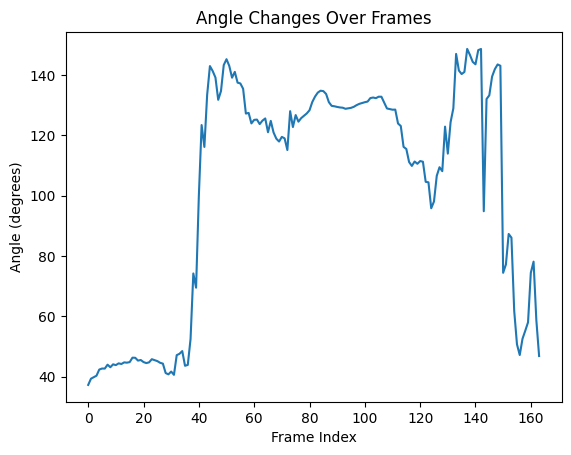

Final sit to stand: 1


In [7]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 使用影片檔案來源
cap = cv2.VideoCapture("/Users/peilinyang/Desktop/Sit_to_Stand/2.mov")

# Curl counter variables
counter = 0
stage = None

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.9, min_tracking_confidence=0.9) as pose:
    angles_list = []  # 用來存儲每一幀的角度

    while cap.isOpened():
        # 讀取影格
        ret, frame = cap.read()

        # 檢查是否成功讀取到影格
        if not ret:
            print("End of video. Exiting...")
            break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark

            # 取得右腳 hip、knee、ankle 的 3D 座標
            right_hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z])

            right_knee = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                                   landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y,
                                   landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z])

            right_ankle = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y,
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z])

            # 計算夾角（以弧度為單位）
            vector1 = right_hip - right_knee
            vector2 = right_ankle - right_knee
            dot_product = np.dot(vector1, vector2)
            norm_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cos_theta = dot_product / norm_product
            angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))

            # 將弧度轉換為角度
            angle_deg = np.degrees(angle_rad)

            # 將角度添加到列表中
            angles_list.append(angle_deg)

            # 設定閾值
            threshold_high = 110
            threshold_low = 50

            # 判斷角度是否超過閾值
            if angle_deg > threshold_high:
                text_color = (0, 255, 0)  # 綠色
            elif angle_deg < threshold_low:
                text_color = (255, 165, 0)  # 橘色
            else:
                text_color = (255, 0, 0)  # 藍色

            # Visualize angle at the top-right corner with color based on threshold
            text_position = (image.shape[1] - 150, 30)  # 設定文字位置
            cv2.putText(image, f"Angle: {angle_deg:.2f}", text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2, cv2.LINE_AA)

            # Curl counter logic
            if angle_deg > 110:
                stage = "stand"
            if angle_deg < 50 and stage == 'stand':
                stage = "sit"
                counter += 1
                print(counter)

        except:
            pass

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

        # 顯示處理後的影像
        cv2.imshow('Mediapipe Feed', image)

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                )
        
        cv2.imshow('Mediapipe Feed', image)

        # 按 'q' 鍵退出
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # 釋放影片檔案來源
    cap.release()
    cv2.destroyAllWindows()

# 繪製角度變化圖表
plt.plot(angles_list)
plt.title('Angle Changes Over Frames')
plt.xlabel('Frame Index')
plt.ylabel('Angle (degrees)')
plt.show()

# Output final counters
print(f"Final sit to stand: {counter}")

6.mov

1
2
3
4
5
6
7
8
9
10
11
End of video. Exiting...


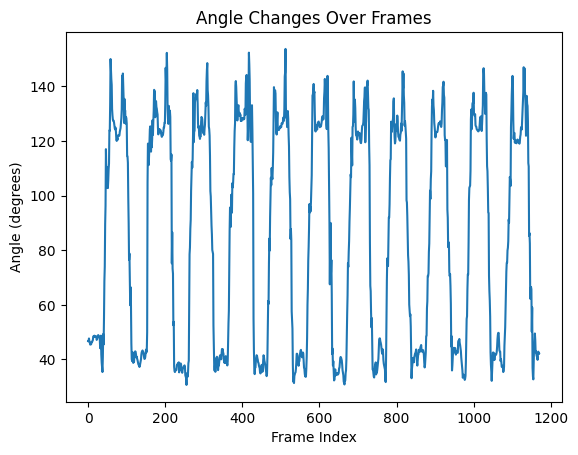

Final sit to stand: 11


In [8]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 使用影片檔案來源
cap = cv2.VideoCapture("/Users/peilinyang/Desktop/Sit_to_Stand/6.mov")

# Curl counter variables
counter = 0
stage = None

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.9, min_tracking_confidence=0.9) as pose:
    angles_list = []  # 用來存儲每一幀的角度

    while cap.isOpened():
        # 讀取影格
        ret, frame = cap.read()

        # 檢查是否成功讀取到影格
        if not ret:
            print("End of video. Exiting...")
            break

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark

            # 取得右腳 hip、knee、ankle 的 3D 座標
            right_hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z])

            right_knee = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                                   landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y,
                                   landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z])

            right_ankle = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y,
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].z])

            # 計算夾角（以弧度為單位）
            vector1 = right_hip - right_knee
            vector2 = right_ankle - right_knee
            dot_product = np.dot(vector1, vector2)
            norm_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cos_theta = dot_product / norm_product
            angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))

            # 將弧度轉換為角度
            angle_deg = np.degrees(angle_rad)

            # 將角度添加到列表中
            angles_list.append(angle_deg)

            # 設定閾值
            threshold_high = 110
            threshold_low = 50

            # 判斷角度是否超過閾值
            if angle_deg > threshold_high:
                text_color = (0, 255, 0)  # 綠色
            elif angle_deg < threshold_low:
                text_color = (255, 165, 0)  # 橘色
            else:
                text_color = (255, 0, 0)  # 藍色

            # Visualize angle at the top-right corner with color based on threshold
            text_position = (image.shape[1] - 150, 30)  # 設定文字位置
            cv2.putText(image, f"Angle: {angle_deg:.2f}", text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2, cv2.LINE_AA)

            # Curl counter logic
            if angle_deg > 110:
                stage = "stand"
            if angle_deg < 50 and stage == 'stand':
                stage = "sit"
                counter += 1
                print(counter)

        except:
            pass

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

        # 顯示處理後的影像
        cv2.imshow('Mediapipe Feed', image)

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                )
        
        cv2.imshow('Mediapipe Feed', image)

        # 按 'q' 鍵退出
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # 釋放影片檔案來源
    cap.release()
    cv2.destroyAllWindows()

# 繪製角度變化圖表
plt.plot(angles_list)
plt.title('Angle Changes Over Frames')
plt.xlabel('Frame Index')
plt.ylabel('Angle (degrees)')
plt.show()

# Output final counters
print(f"Final sit to stand: {counter}")